## Assignment 3_ Part 1_Question 2
- Use "vehicle_collisions" data set.
- For each borough, find out distribution of each collision scale. (one car involved? two? three? or more?)
- Give an csv output with Five columns ('Borough','One-Vehicle','Two-Vehicles','Three-Vehicles','More-Vehicles')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/vehicle_collisions.csv")

In [3]:
df.head()

,UNIQUE KEY,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,...,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,VEHICLE 1 FACTOR,VEHICLE 2 FACTOR,VEHICLE 3 FACTOR,VEHICLE 4 FACTOR,VEHICLE 5 FACTOR
0,3146911,1/1/15,0:20,QUEENS,11358.0,40.751847,-73.787862,"(40.7518471, -73.787862)",47 AVENUE,193 STREET,...,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,TRAFFIC CONTROL DISREGARDED,NaN,NaN,NaN,NaN
1,3146180,1/1/15,0:20,NaN,NaN,40.771289,-73.946693,"(40.7712888, -73.9466928)",NaN,NaN,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,ANIMALS ACTION,NaN,NaN,NaN,NaN
2,3146384,1/1/15,0:21,BROOKLYN,11205.0,40.689445,-73.955121,"(40.6894449, -73.9551212)",BEDFORD AVENUE,LAFAYETTE AVENUE,...,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,FATIGUED/DROWSY,UNSPECIFIED,NaN,NaN,NaN
3,3146013,1/1/15,0:30,BROOKLYN,11213.0,40.673845,-73.925080,"(40.6738445, -73.9250801)",BUFFALO AVENUE,SAINT MARKS AVENUE,...,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,LOST CONSCIOUSNESS,NaN,NaN,NaN,NaN
4,3146120,1/1/15,0:33,NaN,NaN,NaN,NaN,NaN,RICHMOND TERRACE,SOUTH AVENUE,...,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN,UNSPECIFIED,UNSPECIFIED,NaN,NaN,NaN


In [4]:
new_df = df.loc[:,['BOROUGH','VEHICLE 1 TYPE','VEHICLE 2 TYPE', 'VEHICLE 3 TYPE', 'VEHICLE 4 TYPE', 'VEHICLE 5 TYPE']]

In [5]:
new_df.head()

,BOROUGH,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE
0,QUEENS,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN
1,NaN,PASSENGER VEHICLE,NaN,NaN,NaN,NaN
2,BROOKLYN,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
3,BROOKLYN,BUS,PASSENGER VEHICLE,NaN,NaN,NaN
4,NaN,UNKNOWN,PASSENGER VEHICLE,NaN,NaN,NaN


In [6]:
new_df = new_df.dropna(subset=['BOROUGH'])

In [7]:
new_df['COLLISION SCALE'] = new_df.apply(lambda x:x.count()-1, axis=1)

In [8]:
new_df.head()

,BOROUGH,VEHICLE 1 TYPE,VEHICLE 2 TYPE,VEHICLE 3 TYPE,VEHICLE 4 TYPE,VEHICLE 5 TYPE,COLLISION SCALE
0,QUEENS,SPORT UTILITY/STATION WAGON,NaN,NaN,NaN,NaN,1
2,BROOKLYN,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,2
3,BROOKLYN,BUS,PASSENGER VEHICLE,NaN,NaN,NaN,2
5,BROOKLYN,PASSENGER VEHICLE,SPORT UTILITY/STATION WAGON,SPORT UTILITY/STATION WAGON,PASSENGER VEHICLE,NaN,4
6,QUEENS,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY/STATION WAGON,NaN,NaN,3


In [9]:
new_df['COLLISION SCALE'] = new_df['COLLISION SCALE'].apply(lambda x : str(x) if x < 4 else '3+')

In [10]:
temp_df = new_df[['BOROUGH','COLLISION SCALE']]
temp_df.head()

,BOROUGH,COLLISION SCALE
0,QUEENS,1
2,BROOKLYN,2
3,BROOKLYN,2
5,BROOKLYN,3+
6,QUEENS,3


In [11]:
temp_df = temp_df.groupby(['BOROUGH', 'COLLISION SCALE'], as_index=False, sort=False).size().reset_index()
temp_df.head()

,BOROUGH,COLLISION SCALE,0
0,QUEENS,1,12962
1,BROOKLYN,2,80207
2,BROOKLYN,3+,1612
3,QUEENS,3,4498
4,MANHATTAN,1,13318


In [12]:
df1 = temp_df.pivot(index='BOROUGH', columns='COLLISION SCALE', values=0)
df1

COLLISION SCALE,0,1,2,3,3+
BOROUGH,,,,,
BRONX,525,8627,34385,1962,625
BROOKLYN,787,17375,80207,4980,1612
MANHATTAN,801,13318,66958,2024,501
QUEENS,515,12962,70260,4498,1420
STATEN ISLAND,105,2343,10676,759,165


In [13]:
df1.columns = ['NONE_VEHICLE_INVOLVED', 'ONE_VEHICLE_INVOLVED', 'TWO_VEHICLES_INVOLVED', 'THREE_VEHICLES_INVOLVED', 'MORE_VEHICLES_INVOLVED']

In [14]:
final_df = df1.reset_index()
final_df

,BOROUGH,NONE_VEHICLE_INVOLVED,ONE_VEHICLE_INVOLVED,TWO_VEHICLES_INVOLVED,THREE_VEHICLES_INVOLVED,MORE_VEHICLES_INVOLVED
0,BRONX,525,8627,34385,1962,625
1,BROOKLYN,787,17375,80207,4980,1612
2,MANHATTAN,801,13318,66958,2024,501
3,QUEENS,515,12962,70260,4498,1420
4,STATEN ISLAND,105,2343,10676,759,165


In [15]:
final_df.to_csv('outputs/collision_scale_by_borough.csv', index=False)

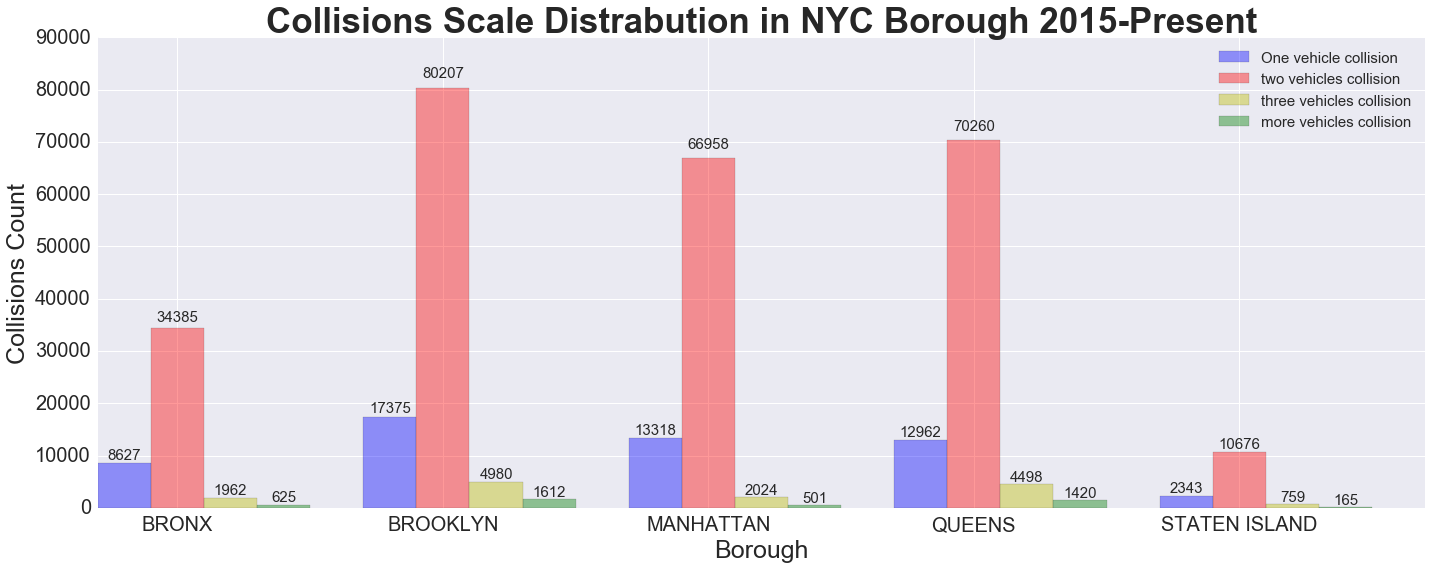

In [16]:
# Generate output as plot. 
one = list(final_df['ONE_VEHICLE_INVOLVED'])
two = list(final_df['TWO_VEHICLES_INVOLVED'])
three = list(final_df['THREE_VEHICLES_INVOLVED'])
more = list(final_df['MORE_VEHICLES_INVOLVED'])
borough = list(final_df['BOROUGH'])

plt.subplots(figsize=(20,8))   
sns.set_style("darkgrid")

index = np.arange(5)
bar_width = 0.2
opacity = 0.4
rects1 = plt.bar(index, one, bar_width, alpha=opacity, color='b', label='One vehicle collision')
rects2 = plt.bar(index+0.2 , two, bar_width, alpha=opacity, color='r', label='two vehicles collision')
rects3 = plt.bar(index+0.4 , three, bar_width, alpha=opacity, color='y', label='three vehicles collision')
rects4 = plt.bar(index+0.6 , more, bar_width, alpha=opacity, color='g', label='more vehicles collision')

plt.title('Collisions Scale Distrabution in NYC Borough 2015-Present', fontweight='bold', fontsize=35)     
plt.xlabel('Borough', fontsize=25)
plt.ylabel('Collisions Count', fontsize=25)
plt.xticks(index+0.3, borough, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=15)
plt.tight_layout()


def addlabel(rects):      # Add top labels
    for rect in rects:
        height = rect.get_height()
        label_position = height * 1.02
        plt.text(rect.get_x() + rect.get_width()/2., label_position, '%d' %int(height), ha='center', va='bottom', fontsize=15)
addlabel(rects1)
addlabel(rects2)
addlabel(rects3)
addlabel(rects4)
plt.show()